<a href="https://colab.research.google.com/github/cristinarainich/Child-Mind-Institute-Project/blob/main/Pheno_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Updated 22/06/2023 20:00

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
import pylab as pl
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
sns.set()

In [4]:
working_path = Path('/content/drive/MyDrive/KKNV')

In [5]:
cd /content/drive/MyDrive/KKNV

/content/drive/MyDrive/KKNV


In [6]:
!ls /content/drive/MyDrive/KKNV

 change_of_diagnosis.csv   HBN_R5_Pheno.csv     pheno_mri.csv
 diagnoses_1906.csv	   HBN_R6_Pheno.csv    'Pilot reading task.gsheet'
 full_pheno.csv		   HBN_R7_Pheno.csv     Query1.csv
 HBN_R10_Pheno.csv	   HBN_R8_Pheno.csv    'Query 1.Dot values.csv'
 HBN_R1_1_Pheno.csv	   HBN_R9_Pheno.csv     Query2.csv
 HBN_R2_1_Pheno.csv	   iq_overview.csv     'Query 2.Dot values.csv'
 HBN_R3_Pheno.csv	   iq_overview.gsheet   Query_final.csv
 HBN_R4_Pheno.csv	   Pheno.csv	        sites.csv


## File informations from different releases

In [ ]:
!ls /content/drive/MyDrive/KKNV

full_pheno.csv	    HBN_R4_Pheno.csv  HBN_R9_Pheno.csv	  Query1.csv
HBN_R10_Pheno.csv   HBN_R5_Pheno.csv  iq_overview.csv	  Query2.csv
HBN_R1_1_Pheno.csv  HBN_R6_Pheno.csv  iq_overview.gsheet  Query_final.csv
HBN_R2_1_Pheno.csv  HBN_R7_Pheno.csv  Pheno.csv		  sites.csv
HBN_R3_Pheno.csv    HBN_R8_Pheno.csv  pheno_mri.csv


In [ ]:
# info on whether there are phenotypical full files and imaging data availale
file1 = pd.read_csv(
    working_path.joinpath('HBN_R1_1_Pheno.csv'),
    index_col=None
)
file2 = pd.read_csv(
    working_path.joinpath('HBN_R2_1_Pheno.csv'),
    index_col=None
)
file3 = pd.read_csv(
    working_path.joinpath('HBN_R3_Pheno.csv'),
    index_col=None
)
file4 = pd.read_csv(
    working_path.joinpath('HBN_R4_Pheno.csv'),
    index_col=None
)
file5 = pd.read_csv(
    working_path.joinpath('HBN_R5_Pheno.csv'),
    index_col=None
)
file6 = pd.read_csv(
    working_path.joinpath('HBN_R6_Pheno.csv'),
    index_col=None
)
file7 = pd.read_csv(
    working_path.joinpath('HBN_R7_Pheno.csv'),
    index_col=None
)
file8 = pd.read_csv(
    working_path.joinpath('HBN_R8_Pheno.csv'),
    index_col=None
)
file9 = pd.read_csv(
    working_path.joinpath('HBN_R9_Pheno.csv'),
    index_col=None
)
file10 = pd.read_csv(
    working_path.joinpath('HBN_R10_Pheno.csv'),
    index_col=None
)

In [ ]:
fullpheno = pd.concat([file1, file2])
fullpheno = pd.concat([fullpheno, file3])
fullpheno = pd.concat([fullpheno, file4])
fullpheno = pd.concat([fullpheno, file5])
fullpheno = pd.concat([fullpheno, file6])
fullpheno = pd.concat([fullpheno, file7])
fullpheno = pd.concat([fullpheno, file8])
fullpheno = pd.concat([fullpheno, file9])
fullpheno = pd.concat([fullpheno, file10])

In [ ]:
fullpheno.to_csv(
    Path(working_path).joinpath('full_pheno.csv')
)

## Creating a file on MRI and full pheno information

In [ ]:
# file with the identifiers that have mri imaging
fullpheno = pd.read_csv(
    working_path.joinpath('full_pheno.csv'),
    index_col=None
)

In [ ]:
fullpheno.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [ ]:
print(fullpheno.shape)
print(len(fullpheno.EID.unique()))
# there are some identifiers that are repeated in the table

(5106, 6)
4245


In [ ]:
unique = []
repetition = []
for i in fullpheno.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(fullpheno.shape[0])
print(len(unique))
print(len(repetition))

5106
4245
861


In [ ]:
full_no_doubles = fullpheno.drop_duplicates()

In [ ]:
unique = []
repetition = []
for i in full_no_doubles.EID.values:
  if i not in unique:
    unique.append(i)
  else:
    if i not in repetition:
      repetition.append(i)
print(full_no_doubles.shape[0])
print(len(unique))
print(len(repetition))
# still there is some repetition but let's see whether something disappears when we clean data

4263
4245
18


In [ ]:
full_no_doubles.groupby(['Full_Pheno']).count()

,EID,Sex,Age,EHQ_Total,Commercial_Use
Full_Pheno,,,,,
No,723,723,723,720,723
Yes,3539,3539,3539,3466,3539


In [ ]:
pheno_mri = full_no_doubles[full_no_doubles['Full_Pheno'] == 'Yes']
print(pheno_mri.shape)

(3539, 6)


In [ ]:
pheno_mri.groupby(['Sex']).count()
# Sex 1 - female, 0 - male

,EID,Age,EHQ_Total,Commercial_Use,Full_Pheno
Sex,,,,,
0.0,2272,2272,2223,2272,2272
1.0,1267,1267,1243,1267,1267


In [ ]:
pheno_mri.groupby(['Commercial_Use']).count()

,EID,Sex,Age,EHQ_Total,Full_Pheno
Commercial_Use,,,,,
No,561,561,561,526,561
Yes,2978,2978,2978,2940,2978


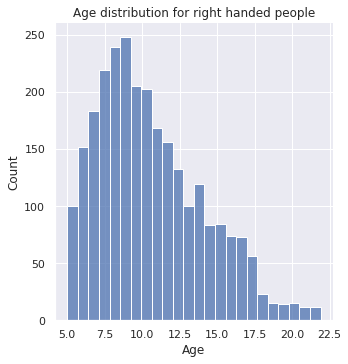

In [ ]:
sns.displot(pheno_mri[pheno_mri['EHQ_Total'] >= 40].Age)
pl.title('Age distribution for right handed people');

In [ ]:
unique = []
repetition = []
for i in pheno_mri[pheno_mri['EHQ_Total'] >= 40].EID.values:
  if i not in unique:
    unique.append(i)
  else:
    repetition.append(i)
print(pheno_mri[pheno_mri['EHQ_Total'] >= 40].shape[0])
print(len(unique))
print(len(repetition))
# There will be no repetition if we clean the data

2684
2684
0


In [ ]:
pheno_mri.to_csv(
    Path(working_path).joinpath('pheno_mri.csv')
)

## For CMI

In [ ]:
data_1 = pd.read_csv(
    working_path.joinpath('Query1.csv'),
    index_col=None,
    low_memory=False
)
data_2 = pd.read_csv(
    working_path.joinpath('Query_final.csv'),
    index_col=None,
    low_memory=False
)

In [ ]:
# work on Identifiers column
ids = data_1.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)
print(len(ids))
print(len(new_ids))

data_1['Identifiers'] = new_ids

8210
8210


In [ ]:
ids = data_2.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)
print(len(ids))
print(len(new_ids))

data_2['Identifiers'] = new_ids

8732
8732


In [ ]:
# data_2 contains an empty row as a first row
# let's delete it
data_2 = data_2.drop(labels=0, axis=0)

In [ ]:
print(data_1.shape)
print(data_2.shape)

(8210, 88)
(8731, 168)


The difference in the shape could be partially explained by the new rows with the other versions of the same identifiers that have been already used in the database: identifier_1, identifier_2, identifier_3 etc.

In [ ]:
# data 1
versions_1 = []
for i in data_1.Identifiers.values.tolist():
  if '_' in i:
    versions_1.append(i)
print(len(versions_1))

# data 2
versions_2 = []
for i in data_2.Identifiers.values.tolist():
  if '_' in i:
    versions_2.append(i)
print(len(versions_2))

3341
3862


In [ ]:
# data 1
data_upd_1 = data_1.copy()
columns = data_upd_1.columns
i = 0
for id in versions_1:
  values = data_upd_1[data_upd_1['Identifiers'] == id].values.tolist()
  while len(values) == 1:
    values = values[0]
  for value in values[1:]:
    if value != '.':
      if type(value) == str:
        column_number = values.index(value)
        row_number = data_upd_1[data_upd_1['Identifiers'] == id[:12]].index[0]
        data_upd_1.at[row_number, columns[column_number]] = value
      elif type(value) != str and math.isnan(value) is not True:
        column_number = values.index(value)
        row_number = data_upd_1[data_upd_1['Identifiers'] == id[:12]].index[0]
        data_upd_1.at[row_number, columns[column_number]] = value
      else:
        if math.isnan(value) is not True:
          print(value, type(value))
  i += 1
print(i)

3341


In [ ]:
for id in versions_1:
  data_upd_1 = data_upd_1[data_upd_1['Identifiers'] != id]
data_upd_1.shape

(4869, 88)

In [ ]:
# data 2
data_upd_2 = data_2.copy()
columns = data_upd_2.columns
i = 0
for id in versions_2:
  values = data_upd_2[data_upd_2['Identifiers'] == id].values.tolist()
  while len(values) == 1:
    values = values[0]
  for value in values[1:]:
    if value != '.':
      if type(value) == str:
        column_number = values.index(value)
        row_number = data_upd_2[data_upd_2['Identifiers'] == id[:12]].index[0]
        data_upd_2.at[row_number, columns[column_number]] = value
      elif type(value) != str and math.isnan(value) is not True:
        column_number = values.index(value)
        row_number = data_upd_2[data_upd_2['Identifiers'] == id[:12]].index[0]
        data_upd_2.at[row_number, columns[column_number]] = value
      else:
        if math.isnan(value) is not True:
          print(value, type(value))
  i += 1
print(i)

3862


In [ ]:
for id in versions_2:
  data_upd_2 = data_upd_2[data_upd_2['Identifiers'] != id]
data_upd_2.shape

(4869, 168)

Checking whether in this additional visits rows there were any information on a new diagnosis update. No diagnosis updates were in the additional visits of participants already included in the database (neither in query 1 nor 2)

In [ ]:
for id in versions_1:
  for number in range(1, 10):
    column = 'ConsensusDx,DX_0' + str(number)
    if data_1[data_1['Identifiers'] == id][column].values[0] != '.':
      print(data_1[data_1['Identifiers'] == id][column].values)
    if data_1[data_1['Identifiers'] == id]['ConsensusDx,DX_10'].values[0] != '.':
      print(data_1[data_1['Identifiers'] == id]['ConsensusDx,DX_10'].values)

In [ ]:
for id in versions_2:
  for number in range(1, 10):
    column = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
    if data_2[data_2['Identifiers'] == id][column].values[0] != '.':
      print(data_2[data_2['Identifiers'] == id][column].values)
    if data_2[data_2['Identifiers'] == id]['Diagnosis_ClinicianConsensus,DX_10'].values[0] != '.':
      print(data_2[data_2['Identifiers'] == id]['Diagnosis_ClinicianConsensus,DX_10'].values)


Checking whether two inquires have the same identifiers

In [ ]:
ids1 = data_upd_1['Identifiers'].values.tolist()
ids2 = data_upd_2['Identifiers'].values.tolist()

different = []
for i in range(0, 4869):
  if ids1[i] not in ids2:
    different.append(ids1[i])
  if ids2[i] not in ids1:
    if ids2[i] not in different:
      different.append(ids2[i])
print(different)

['', 'NDARXP325YLV']


In [ ]:
data_upd_1[data_upd_1['Identifiers'] == '']

,Identifiers,"Basic_Demos,Age","Basic_Demos,Sex","Basic_Demos,Site","CELF,CELF_Total","ConsensusDx,DX_01","ConsensusDx,DX_01_Code","ConsensusDx,DX_01_Confirmed","ConsensusDx,DX_02","ConsensusDx,DX_02_Code",...,"WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd","WISC,WISC_FSIQ","WISC,WISC_PSI","WISC,WISC_VCI","WISC,WISC_VSI","WISC,WISC_WMI"
2175,,NaN,NaN,NaN,NaN,.,.,.,.,.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_upd_2[data_upd_2['Identifiers'] == 'NDARXP325YLV']

,Identifiers,"Audit,AUDIT_Total_Score","Barratt,Barratt_Total","Barratt,Barratt_Total_Edu","Barratt,Barratt_Total_Occ","Basic_Demos,Age","Basic_Demos,Sex","Basic_Demos,Site","CELF,CELF_Total","CTOPP,CTOPP_BW_D",...,"WIAT,WIAT_Num_Stnd","WIAT,WIAT_Pseudo_Stnd","WIAT,WIAT_RC_Stnd","WIAT,WIAT_Spell_Stnd","WIAT,WIAT_Word_Stnd","WISC,WISC_FSIQ","WISC,WISC_PSI","WISC,WISC_VCI","WISC,WISC_VSI","WISC,WISC_WMI"
8731,NDARXP325YLV,4,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


In [ ]:
# droping this cases as we won't include them in the comparison
data_upd_1.drop([2175], axis=0, inplace=True)
data_upd_2.drop([8731], axis=0, inplace=True)

Checking whether all of the undentifiers are unique

In [ ]:
print(data_upd_1.shape)
print(len(data_upd_1.Identifiers.unique()))

(4868, 88)
4868


In [ ]:
print(data_upd_2.shape)
print(len(data_upd_2.Identifiers.unique()))

(4868, 168)
4868


Checking the amount of each category for the Consensus Diagnosis in query 1 and 2.

In [ ]:
# diagnosis 1
query_1 = data_upd_1.groupby(['ConsensusDx,DX_01'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_01'])['Identifiers'].count()

In [ ]:
diag1 = query_1.index
diag2 = query_2.index

# in the first list but not in the second
diag_name_1 = []
for i in diag1:
  if i not in diag2:
    if i not in diag_name_1:
      diag_name_1.append(i)
print(diag_name_1)

#in second list but not in the first
diag_name_2 = []
for i in diag2:
  if i not in diag1:
    if i not in diag_name_2:
      diag_name_2.append(i)
print(diag_name_2)

[]
['Alcohol Use Disorder', 'Avoidant/Restrictive Food Intake Disorder', 'Bulimia Nervosa', 'Conduct Disorder-Childhood-onset type', 'Cyclothymic Disorder', 'Delirium due to another medical condition', 'Delirium due to multiple etiologies', 'Depressive Disorder Due to Another Medical Condition', 'Developmental Coordination Disorder', 'Excoriation (Skin-Picking) Disorder', 'Gender Dysphoria in Adolescents and Adults', 'Intermittent Explosive Disorder', 'Oppositional Defiant Disorder', 'Other Specified Disruptive, Impulse-Control, and Conduct Disorder', 'Other Specified Feeding or Eating Disorder', 'Other Specified Obsessive-Compulsive and Related Disorder', 'Substance/Medication-Induced Bipolar and Related Disorder']


In [ ]:
# diagnosis 2
query_1 = data_upd_1.groupby(['ConsensusDx,DX_02'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_02'])['Identifiers'].count()

In [ ]:
diag1 = query_1.index
diag2 = query_2.index

# in the first list but not in the second
diag_name_1 = []
for i in diag1:
  if i not in diag2:
    if i not in diag_name_1:
      diag_name_1.append(i)
print(diag_name_1)

#in second list but not in the first
diag_name_2 = []
for i in diag2:
  if i not in diag1:
    if i not in diag_name_2:
      diag_name_2.append(i)
print(diag_name_2)

[]
['Anorexia Nervosa-Restricting Type', 'Avoidant/Restrictive Food Intake Disorder', 'Binge-Eating Disorder', 'Cannabis Use Disorder', 'Conduct Disorder-Adolescent-onset type', 'Conduct Disorder-Childhood-onset type', 'Illness Anxiety Disorder', 'Insomnia Disorder', 'Intermittent Explosive Disorder', 'Non-Rapid Eye Movement Sleep Arousal Disorders', 'Oppositional Defiant Disorder', 'Other (or Unknown) Substance-Induced Disorders', 'Other Specified Disruptive, Impulse-Control, and Conduct Disorder', 'Other Specified Elimination Disorder with Fecal Symptoms', 'Other Specified Obsessive-Compulsive and Related Disorder', 'Other Specified Tic Disorder', 'Pica in Children', 'Posttraumatic Stress Disorder', 'Sibling Relational Problem', 'Somatic Symptom Disorder', 'Unspecified Depressive Disorder', 'Unspecified Feeding or Eating Disorder']


In [ ]:
# diagnosis 3
query_1 = data_upd_1.groupby(['ConsensusDx,DX_03'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_03'])['Identifiers'].count()

In [ ]:
# diagnosis 4
query_1 = data_upd_1.groupby(['ConsensusDx,DX_04'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_04'])['Identifiers'].count()

In [ ]:
# diagnosis 5
query_1 = data_upd_1.groupby(['ConsensusDx,DX_05'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_05'])['Identifiers'].count()

In [ ]:
# diagnosis 6
query_1 = data_upd_1.groupby(['ConsensusDx,DX_06'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_06'])['Identifiers'].count()

In [ ]:
# diagnosis 7
query_1 = data_upd_1.groupby(['ConsensusDx,DX_07'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_07'])['Identifiers'].count()

In [ ]:
# diagnosis 8
query_1 = data_upd_1.groupby(['ConsensusDx,DX_08'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_08'])['Identifiers'].count()

In [ ]:
# diagnosis 9
query_1 = data_upd_1.groupby(['ConsensusDx,DX_09'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_09'])['Identifiers'].count()

In [ ]:
# diagnosis 10
query_1 = data_upd_1.groupby(['ConsensusDx,DX_10'])['Identifiers'].count()
query_2 = data_upd_2.groupby(['Diagnosis_ClinicianConsensus,DX_10'])['Identifiers'].count()

Now, we would look into what ids changed their status

In [ ]:
ids_1 = data_upd_1[['Identifiers', 'ConsensusDx,DX_01', 'ConsensusDx,DX_02',
                    'ConsensusDx,DX_03', 'ConsensusDx,DX_04', 'ConsensusDx,DX_05',
                    'ConsensusDx,DX_06', 'ConsensusDx,DX_07', 'ConsensusDx,DX_08',
                    'ConsensusDx,DX_09', 'ConsensusDx,DX_10']]

In [ ]:
ids_2 = data_upd_2[['Identifiers', 'Diagnosis_ClinicianConsensus,DX_01', 'Diagnosis_ClinicianConsensus,DX_02',
            'Diagnosis_ClinicianConsensus,DX_03', 'Diagnosis_ClinicianConsensus,DX_04', 'Diagnosis_ClinicianConsensus,DX_05',
            'Diagnosis_ClinicianConsensus,DX_06', 'Diagnosis_ClinicianConsensus,DX_07', 'Diagnosis_ClinicianConsensus,DX_08',
            'Diagnosis_ClinicianConsensus,DX_09', 'Diagnosis_ClinicianConsensus,DX_10']]

In [ ]:
ids_1 = ids_1.fillna(0)
ids_2 = ids_2.fillna(0)

In [ ]:
ids_1 = ids_1.reset_index(drop = True)
ids_2 = ids_2.reset_index(drop = True)

In [ ]:
ids_1[ids_1['ConsensusDx,DX_01'] == '.'].to_csv(
    Path(working_path).joinpath('Query 1.Dot values.csv')
)

In [ ]:
ids_2[ids_2['Diagnosis_ClinicianConsensus,DX_01'] == '.'].to_csv(
    Path(working_path).joinpath('Query 2.Dot values.csv')
)

In [ ]:
diagnoses = ['Unknown', 'ADHD-Combined Type', 'ADHD-Hyperactive/Impulsive Type', 'ADHD-Inattentive Type', 'Acute Stress Disorder',
             'Adjustment Disorders', 'Agoraphobia', 'Alcohol Use Disorder', 'Anorexia Nervosa-Restricting Type', 'Anorexia Nervosa-Binge Eating/Purging Type',
             'Autism Spectrum Disorder', 'Avoidant/Restrictive Food Intake Disorder', 'Binge-Eating Disorder', 'Bipolar I Disorder', 'Bipolar II Disorder',
  'Body Dysmorphic Disorder', 'Borderline Intellectual Functioning', 'Borderline Personality Disorder', 'Bulimia Nervosa',
  'Cannabis Use Disorder', 'Child Neglect', 'Child Onset Fluency Disorder (Stuttering)', 'Conduct Disorder-Adolescent-onset type',
  'Conduct Disorder-Childhood-onset type', 'Conduct Disorder-Unspecified onset', 'Conversion Disorder', 'Cyclothymic Disorder',
  'Delirium due to another medical condition', 'Delirium due to multiple etiologies', 'Depressive Disorder Due to Another Medical Condition',
  'Developmental Coordination Disorder', 'Disruptive Mood Dysregulation Disorder', 'Disinhibited Social Engagement Disorder', 'Encopresis',
  'Enuresis', 'Excoriation (Skin-Picking) Disorder', 'Gender Dysphoria in Adolescents and Adults',
  'Gender Dysphoria in Children', 'Generalized Anxiety Disorder', 'Hoarding Disorder', 'Illness Anxiety Disorder',
  'Insomnia Disorder', 'Intellectual Disability-Mild', 'Intellectual Disability-Moderate', 'Intellectual Disability-Severe',
  'Intermittent Explosive Disorder', 'Language Disorder', 'Major Depressive Disorder', 'Major Neurocognitive Disorder Due to Epilepsy',
  'Narcolepsy', 'Neurobehavioral Disorder Associated with Prenatal Alcohol Exposure (ND-PAE)', 'No Diagnosis Given', 'No Diagnosis Given: Incomplete Eval',
  'Non-Rapid Eye Movement Sleep Arousal Disorders', 'Obsessive-Compulsive Disorder', 'Oppositional Defiant Disorder',
  'Other (or Unknown) Substance Use Disorder', 'Other (or Unknown) Substance-Induced Disorders',
 'Other Specified Anxiety Disorder', 'Other Specified Attention-Deficit/Hyperactivity Disorder', 'Other Specified Bipolar and Related Disorder',
  'Other Specified Depressive Disorder', 'Other Specified Disruptive, Impulse-Control, and Conduct Disorder',
  'Other Specified Elimination Disorder with Fecal Symptoms', 'Other Specified Elimination Disorder with Urinary Symptoms',
  'Other Specified Feeding or Eating Disorder', 'Other Specified Insomnia Disorder',
  'Other Specified Neurodevelopmental Disorder', 'Other Specified Obsessive-Compulsive and Related Disorder',
  'Other Specified Schizophrenia Spectrum and Other Psychotic Disorder', 'Other Specified Tic Disorder',
  'Other Specified Trauma- and Stressor-Related Disorder', 'Panic Disorder', 'Parent-Child Relational Problem',
  'Persistent (Chronic) Motor or Vocal Tic Disorder', 'Persistent Depressive Disorder (Dysthymia)', 'Pica in Children',
  'Posttraumatic Stress Disorder', 'Provisional Tic Disorder', 'Reactive Attachment Disorder', 'Schizophrenia',
  'Selective Mutism', 'Separation Anxiety', 'Sibling Relational Problem', 'Social (Pragmatic) Communication Disorder',
  'Social Anxiety (Social Phobia)', 'Somatic Symptom Disorder', 'Specific Learning Disorder with Impairment in Mathematics',
  'Specific Learning Disorder with Impairment in Reading', 'Specific Learning Disorder with Impairment in Written Expression',
  'Specific Phobia', 'Speech Sound Disorder', 'Substance/Medication-Induced Bipolar and Related Disorder',
  'Substance/Medication-Induced Depressive Disorder',
  'Tobacco Use Disorder', 'Tourettes Disorder', 'Trichotillomania (Hair-Pulling Disorder)', 'Unspecified Anxiety Disorder',
  'Unspecified Attention-Deficit/Hyperactivity Disorder', 'Unspecified Bipolar and Related Disorder', 'Unspecified Depressive Disorder',
  'Unspecified Feeding or Eating Disorder', 'Unspecified Intellectual Disability', 'Unspecified Neurodevelopmental Disorder',
  'Unspecified Tic Disorder', 'Unspecified Trauma- and Stressor-Related Disorder'
             ]

In [ ]:
data_count_1 = pd.DataFrame(columns=diagnoses)
data_count_2 = pd.DataFrame(columns=diagnoses)
data_count_1['ID'] = ids_1['Identifiers']
data_count_2['ID'] = ids_2['Identifiers']

In [ ]:
print(ids_1.shape)
print(data_count_1.shape)
print(ids_2.shape)
print(data_count_2.shape)

(4868, 11)
(4868, 107)
(4868, 11)
(4868, 107)


In [ ]:
# data 1
ids = ids_1['Identifiers'].values.tolist()
for id in ids:
  subset = ids_1[ids_1['Identifiers'] == id].values.tolist()[0]
  disorders = []
  for element in subset[1:]:
    if element == '.' or element == ' ' or element == 0:
      disorders.append('Unknown')
    elif type(element) is str:
      if element == 'Specific Learning Disorder with Impairment in Reading ':
        disorders.append('Specific Learning Disorder with Impairment in Reading')
      elif element == 'Obsessive-Compulsive Disorder ':
        disorders.append('Obsessive-Compulsive Disorder')
      elif element == 'Specific Learning Disorder with Impairment in Mathematics ':
        disorders.append('Specific Learning Disorder with Impairment in Mathematics')
      elif element == 'Neurobehavioral Disorder Associated with Prenatal Alcohol Exposure (ND-PAE) ':
        disorders.append('Neurobehavioral Disorder Associated with Prenatal Alcohol Exposure (ND-PAE)')
      else:
        disorders.append(element)
    else:
      break
      print(element)
      print(subset)
      print(disorders)

  for disorder in disorders:
    counter = 0
    for diagnos in diagnoses:
      if disorder == diagnos:
        data_count_1.at[ids.index(id), diagnos] = 1
        counter += 1
    if counter == 0:
      print(disorders)
      print(disorder)
      break

In [ ]:
# data 2
ids = ids_2['Identifiers'].values.tolist()
for id in ids:
  subset = ids_2[ids_2['Identifiers'] == id].values.tolist()[0]
  disorders = []
  for element in subset[1:]:
    if element == '.' or element == ' ' or element == 0:
      disorders.append('Unknown')
    elif type(element) is str:
      if element == 'Specific Learning Disorder with Impairment in Reading ':
        disorders.append('Specific Learning Disorder with Impairment in Reading')
      elif element == 'Obsessive-Compulsive Disorder ':
        disorders.append('Obsessive-Compulsive Disorder')
      elif element == 'Specific Learning Disorder with Impairment in Mathematics ':
        disorders.append('Specific Learning Disorder with Impairment in Mathematics')
      elif element == 'Neurobehavioral Disorder Associated with Prenatal Alcohol Exposure (ND-PAE) ':
        disorders.append('Neurobehavioral Disorder Associated with Prenatal Alcohol Exposure (ND-PAE)')
      elif element == 'Child Neglect, Suspected':
        disorders.append('Child Neglect')
      else:
        disorders.append(element)
    else:
      break
      print(element)
      print(subset)
      print(disorders)

  for disorder in disorders:
    counter = 0
    for diagnos in diagnoses:
      if disorder == diagnos:
        data_count_2.at[ids.index(id), diagnos] = 1
        counter += 1
    if counter == 0:
      print(disorders)
      print(disorder)
      break

In [ ]:
print(ids_1.shape)
print(data_count_1.shape)

(4868, 11)
(4868, 107)


In [ ]:
print(ids_2.shape)
print(data_count_2.shape)

(4868, 11)
(4868, 107)


In [ ]:
data_count_1 = data_count_1.fillna(0)
data_count_2 = data_count_2.fillna(0)

In [ ]:
ids = data_count_1['ID'].values.tolist()
change_adds = []
adds = []
change_deletes = []
deletes = []
unique = []

for id in ids:
  diag1 = data_count_1[data_count_1['ID'] == id].values.tolist()[0]
  diag2 = data_count_2[data_count_2['ID'] == id].values.tolist()[0]
  for i in range(0, len(diag1)):
    if diag1[i] != diag2[i]:
      if diag1[i] == 0 and diag2[i] == 1:
        change_adds.append(id)
        adds.append(diagnoses[i])
        if id not in unique:
          unique.append(id)
      elif diag1[i] == 1 and diag2[i] == 0:
        change_deletes.append(id)
        deletes.append(diagnoses[i])
        if id not in unique:
          unique.append(id)

      else:
        print(id)
        print(diag1[i], diag2[i])
        break

In [ ]:
print(len(change_adds))
print(len(adds))
print(len(change_deletes))
print(len(deletes))
print(len(unique))

8401
8401
11
11
3280


In [ ]:
df = pd.DataFrame(columns=['ID', 'additions', 'deletions'])

In [ ]:
df['ID'] = change_adds
df['additions'] = adds

In [ ]:
df.shape

(8401, 3)

In [ ]:
# among unique ids there is one identifier who has only the deletions
# and doesn't have any addditions
# this is why the groupby method results in the length of 3279
change_of_diagnosis = df.groupby(['ID', 'additions']).count()

In [ ]:
change_of_diagnosis.to_csv(
    Path(working_path).joinpath('change_of_diagnosis.csv')
)

In [ ]:
change_of_diagnosis

deletions
ID           additions                                                    
NDARAA112DMH Other Specified Disruptive, Impulse-Control, an...          0
NDARAA117NEJ Oppositional Defiant Disorder                               0
NDARAA306NT2 ADHD-Inattentive Type                                       0
             Generalized Anxiety Disorder                                0
             Language Disorder                                           0
...                                                                    ...
ndarvn280jtn ADHD-Combined Type                                          0
             Language Disorder                                           0
             Specific Learning Disorder with Impairment in M...          0
             Specific Learning Disorder with Impairment in R...          0
             Specific Learning Disorder with Impairment in W...          0

[8401 rows x 1 columns]

In [ ]:
deletes

['No Diagnosis Given',
 'Unknown',
 'No Diagnosis Given: Incomplete Eval',
 'No Diagnosis Given: Incomplete Eval',
 'Unknown',
 'Unknown',
 'Unknown',
 'No Diagnosis Given: Incomplete Eval',
 'Unknown',
 'No Diagnosis Given',
 'Unknown']

In [ ]:
change_deletes

['NDARDM118LR6',
 'NDARLA048NYE',
 'NDARPL406KX4',
 'NDARRY006EMB',
 'NDARXR250LW3',
 'NDARZT957CWG',
 'NDARUR202RX7',
 'NDARFF988YMA',
 'NDARNN761ZPA',
 'NDARRG499ZWN',
 'NDARTM712HBD']

## Pipeline to make the data convinient to use

Here we are going to work on the database from the 2nd query where all of the visits are combined within their original identifier.

In [7]:
# file with the identifiers that have mri imaging
pheno_mri = pd.read_csv(
    working_path.joinpath('pheno_mri.csv'),
    index_col=None
)

In [8]:
pheno_mri.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
pheno_mri.drop(['Unnamed: 0.1'], axis=1, inplace=True)

In [10]:
pheno_mri.head()

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
0,NDARYM832PX3,1.0,7.048254,-33.35,No,Yes
1,NDARNJ687DMC,1.0,6.348163,46.67,No,Yes
2,NDARFM080VAF,1.0,7.623203,-100.00,No,Yes
3,NDARFW130NGG,1.0,8.316107,93.34,No,Yes
4,NDARDT800YVF,0.0,17.510381,86.67,No,Yes


In [11]:
# our dataset
data = pd.read_csv(
    working_path.joinpath('Query_final.csv'),
    index_col=None,
    low_memory=False
)

In [12]:
ids = data.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)
print(len(ids))
print(len(new_ids))

data['Identifiers'] = new_ids

8732
8732


In [13]:
data = data.drop(labels=0, axis=0)

In [15]:
versions = []
for i in data.Identifiers.values.tolist():
  if '_' in i:
    versions.append(i)
print(len(versions))

3862


In [16]:
columns = data.columns
i = 0
for id in versions:
  values = data[data['Identifiers'] == id].values.tolist()
  while len(values) == 1:
    values = values[0]
  for value in values[1:]:
    if value != '.':
      if type(value) == str:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      elif type(value) != str and math.isnan(value) is not True:
        column_number = values.index(value)
        row_number = data[data['Identifiers'] == id[:12]].index[0]
        data.at[row_number, columns[column_number]] = value
      else:
        if math.isnan(value) is not True:
          print(value, type(value))
  i += 1
print(i)

3862


In [17]:
for id in versions:
  data = data[data['Identifiers'] != id]
data.shape

(4869, 168)

In [18]:
data_site = pd.read_csv(
    working_path.joinpath('sites.csv'),
    index_col=None,
    low_memory=False
)

In [19]:
# the first row is empty so let's drop it
data_site.drop([0], axis=0, inplace=True)

In [20]:
# work on Identifiers column
ids = data_site.Identifiers.values
new_ids = []
for i in ids:
  new_i = i.replace(',assessment', '')
  new_ids.append(new_i)
print(len(ids))
print(len(new_ids))

data_site['Identifiers'] = new_ids

4868
4868


In [25]:
# weird subject
data = data[data['Identifiers'] != 'NDARXP325YLV']

In [26]:
# let's add the site status to everyone in the data
ids_site = data_site.Identifiers.values.tolist()
ids_data = data.Identifiers.values.tolist()
print(len(ids_site))
print(len(ids_data))
different = []
for i in ids_site:
  if i not in ids_data:
    if i not in different:
      different.append(i)
for i in ids_data:
  if i not in ids_site:
    if i not in different:
      different.append(i)
print(different)
# the identifiers are identical

4868
4868
[]


In [27]:
new_site = []
site = data_site['Basic_Demos,Study_Site'].values.tolist()
for id in ids_data:
  number = ids_site.index(id)
  new_site.append(site[number])

In [28]:
data['Site'] = new_site

**Crossreferencing to understand who has the full pheno**

In [29]:
print(pheno_mri.shape)
print(data.shape)

(4344, 6)
(4868, 169)


In [30]:
# not all of the IDs in pheno_mri file are unique
len(pheno_mri.EID.unique())

3539

In [31]:
pheno_mri_no_duplicates = pheno_mri.drop_duplicates()

In [32]:
print(pheno_mri_no_duplicates.shape)
len(pheno_mri_no_duplicates.EID.unique())

(3539, 6)


3539

In [33]:
print(pheno_mri_no_duplicates.shape)
print(data.shape)

(3539, 6)
(4868, 169)


In [34]:
full_ids = pheno_mri_no_duplicates.EID.values.tolist()
data_ids = data.Identifiers.values.tolist()
hits = []
misses = []
indices = []
for i in data_ids:
  if i in full_ids:
    hits.append(i)
  elif i not in full_ids:
    misses.append(i)
    indices.append(data_ids.index(i))
print(len(hits))

3538


In [35]:
# One participant is missing from the data. It could be the case that the experiment is nor over.
for i in full_ids:
  if i not in hits:
    print(i)

NDARAL828WXM


In [36]:
pheno_mri[pheno_mri['EID'] == 'NDARAL828WXM']

,EID,Sex,Age,EHQ_Total,Commercial_Use,Full_Pheno
3253,NDARAL828WXM,0.0,15.188569,63.34,Yes,Yes


In [37]:
# so according to this dataset there are 1330 who doesn't have full phenotypical information
# but we won't trust it so much
data_pheno = data.copy()

In [38]:
for i in misses:
  data_pheno = data_pheno[data_pheno['Identifiers'] != i]

In [39]:
print(data_pheno.shape)
print(data.shape)

(3538, 169)
(4868, 169)


Here is our reduced data frame with participant who has the full phenotypic file. Let's now choose only right handed participants.

In [40]:
# work on Age column
data_pheno['Basic_Demos,Age'] = data_pheno['Basic_Demos,Age'].astype(float)
data['Basic_Demos,Age'] = data['Basic_Demos,Age'].astype(float)

In [41]:
# work on Sex column
data_pheno['Basic_Demos,Sex'] = data_pheno['Basic_Demos,Sex'].astype(int)
data['Basic_Demos,Sex'] = data['Basic_Demos,Sex'].astype(int)

In [42]:
# work on Site column
data_pheno['Site'] = data_pheno['Site'].astype(int)
data['Site'] = data['Site'].astype(int)

data_pheno.drop(['Basic_Demos,Site'], axis=1, inplace=True)
data.drop(['Basic_Demos,Site'], axis=1, inplace=True)

In [43]:
data['Diagnosis_ClinicianConsensus,DX_01'] = data['Diagnosis_ClinicianConsensus,DX_01'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_02'] = data['Diagnosis_ClinicianConsensus,DX_02'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_03'] = data['Diagnosis_ClinicianConsensus,DX_03'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_04'] = data['Diagnosis_ClinicianConsensus,DX_04'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_05'] = data['Diagnosis_ClinicianConsensus,DX_05'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_06'] = data['Diagnosis_ClinicianConsensus,DX_06'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_07'] = data['Diagnosis_ClinicianConsensus,DX_07'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_08'] = data['Diagnosis_ClinicianConsensus,DX_08'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_09'] = data['Diagnosis_ClinicianConsensus,DX_09'].fillna('.')
data['Diagnosis_ClinicianConsensus,DX_10'] = data['Diagnosis_ClinicianConsensus,DX_10'].fillna('.')

In [44]:
data_pheno['Diagnosis_ClinicianConsensus,DX_01'] = data_pheno['Diagnosis_ClinicianConsensus,DX_01'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_02'] = data_pheno['Diagnosis_ClinicianConsensus,DX_02'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_03'] = data_pheno['Diagnosis_ClinicianConsensus,DX_03'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_04'] = data_pheno['Diagnosis_ClinicianConsensus,DX_04'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_05'] = data_pheno['Diagnosis_ClinicianConsensus,DX_05'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_06'] = data_pheno['Diagnosis_ClinicianConsensus,DX_06'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_07'] = data_pheno['Diagnosis_ClinicianConsensus,DX_07'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_08'] = data_pheno['Diagnosis_ClinicianConsensus,DX_08'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_09'] = data_pheno['Diagnosis_ClinicianConsensus,DX_09'].fillna('.')
data_pheno['Diagnosis_ClinicianConsensus,DX_10'] = data_pheno['Diagnosis_ClinicianConsensus,DX_10'].fillna('.')

In [45]:
# work on Diagnosis column
# looks like a dot could be no diagnosis as it seems to be consistent across the columns
# there are also nan values in confirmed column
# throw away this 'No Diagnosis Given: Incomplete Eval'
# give 0 to these 'No Diagnosis Given'
def diagnosis(df, number):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(number)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(number) + '_Confirmed'
  diagnosis = df[name_diag].values
  confirmed = df[name_conf].values

  dyslexia = []
  new_diagnosis = []
  for i in range(0, df.shape[0]):
    # if it's '.', ' ' value or incomplete eval
    if diagnosis[i] == '.' or diagnosis[i] == ' ':
      dyslexia.append('.')
      new_diagnosis.append('.')
    elif  'Incomplete' in diagnosis[i]:
      dyslexia.append('Incomplete')
      new_diagnosis.append('Incomplete')
    # if it is no diagnisis given
    elif diagnosis[i] == 'No Diagnosis Given':
      dyslexia.append('Control')
      new_diagnosis.append('Control')
    # if it's SLD
    elif 'Specific Learning Disorder with' in diagnosis[i]:
      if confirmed[i] != '0':
        dyslexia.append('dys')
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)
    # if some other diagnosis
    else:
      if confirmed[i] != '0':
        dyslexia.append(0)
        new_diagnosis.append(diagnosis[i])
      elif confirmed[i] == '0':
        dyslexia.append(0)
        new_diagnosis.append(0)

  return dyslexia, new_diagnosis

In [46]:
all_diagnosis = {}
all_dys = {}
for i in range(1, 10):
  dyslexia, new_diagnosis = diagnosis(data_pheno, i)
  all_dys['diag_%s' % i] = dyslexia
  all_diagnosis['diag_%s' % i] = new_diagnosis

In [47]:
# for pheno data
dys_status = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_dys:
    subset = all_dys[sublist][i]
    participant.append(subset)

  if 'Incomplete' in participant:
    dys_status.append('Incomplete')
  elif 'Control' in participant:
    dys_status.append(0)
  elif 'dys' in participant:
    dys_status.append(1)
  else:
    dys_status.append(0)

In [48]:
# for pheno data
all_status = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  add = []
  for sublist in all_diagnosis:
    subset = all_diagnosis[sublist][i]
    participant.append(subset)

  if 'Incomplete' in participant:
    all_status.append('Incomplete')
  elif 'Control' in participant:
    all_status.append(0)
  else:
    for each in participant:
      if each != '.' and each != 0:
        add.append(each)
    if len(add) == 0:
      if (i == '.' for i in participant):
        all_status.append('.')
      else:
        print(participant)
        print(add)
        break
    elif len(add) == 1:
      all_status.append(add[0])
    else:
      all_status.append(add)

In [49]:
data_pheno['DD'] = dys_status
data_pheno['Diagnosis'] = all_status

In [50]:
# for all data
all_diagnosis = {}
all_dys = {}
for i in range(1, 10):
  dyslexia, new_diagnosis = diagnosis(data, i)
  all_dys['diag_%s' % i] = dyslexia
  all_diagnosis['diag_%s' % i] = new_diagnosis

dys_status = []
for i in range(0, data.shape[0]):
  participant = []
  for sublist in all_dys:
    subset = all_dys[sublist][i]
    participant.append(subset)

  if 'Incomplete' in participant:
    dys_status.append('Incomplete')
  elif 'Control' in participant:
    dys_status.append(0)
  elif 'dys' in participant:
    dys_status.append(1)
  else:
    dys_status.append(0)

all_status = []
for i in range(0, data.shape[0]):
  participant = []
  add = []
  for sublist in all_diagnosis:
    subset = all_diagnosis[sublist][i]
    participant.append(subset)

  if 'Incomplete' in participant:
    all_status.append('Incomplete')
  elif 'Control' in participant:
    all_status.append(0)
  else:
    for each in participant:
      if each != '.' and each != 0:
        add.append(each)
    if len(add) == 0:
      if (i == '.' for i in participant):
        all_status.append('.')
      else:
        print(participant)
        print(add)
        break
    elif len(add) == 1:
      all_status.append(add[0])
    else:
      all_status.append(add)

In [51]:
data['DD'] = dys_status
data['Diagnosis'] = all_status

In [52]:
for i in range(1,10):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(i)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Confirmed'
  name_code = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Code'
  data_pheno.drop([name_diag], axis=1, inplace=True)
  data_pheno.drop([name_conf], axis=1, inplace=True)
  data_pheno.drop([name_code], axis=1, inplace=True)
data_pheno.drop(['Diagnosis_ClinicianConsensus,DX_10'], axis=1, inplace=True)
data_pheno.drop(['Diagnosis_ClinicianConsensus,DX_10_Code'], axis=1, inplace=True)
data_pheno.drop(['Diagnosis_ClinicianConsensus,DX_10_Confirmed'], axis=1, inplace=True)

In [53]:
for i in range(1,10):
  name_diag = 'Diagnosis_ClinicianConsensus,DX_0' + str(i)
  name_conf = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Confirmed'
  name_code = 'Diagnosis_ClinicianConsensus,DX_0' + str(i) + '_Code'
  data.drop([name_diag], axis=1, inplace=True)
  data.drop([name_conf], axis=1, inplace=True)
  data.drop([name_code], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10'], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10_Code'], axis=1, inplace=True)
data.drop(['Diagnosis_ClinicianConsensus,DX_10_Confirmed'], axis=1, inplace=True)

In [54]:
print('Control subjects')
print(data[(data['DD'] == 0) & (data['Diagnosis'] == 0)].shape[0])
print('Disorders w/out DD')
print(data[(data['DD'] == 0) & (data['Diagnosis'] != 0)].shape[0])
print('Disorders w DD')
print(data[data['DD'] == 1].shape[0])

Control subjects
373
Disorders w/out DD
3320
Disorders w DD
649


In [55]:
print('Control subjects')
print(data_pheno[(data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] == 0)].shape[0])
print('Disorders w/out DD')
print(data_pheno[(data_pheno['DD'] == 0) & (data_pheno['Diagnosis'] != 0)].shape[0])
print('Disorders w DD')
print(data_pheno[data_pheno['DD'] == 1].shape[0])

Control subjects
307
Disorders w/out DD
2512
Disorders w DD
524


In [56]:
new_diag = []
new_dtypes = []
diag = data.Diagnosis.values
for i in diag:
  if i == 0:
    new_diag.append(i)
    new_dtypes.append(i)
  # one diagnosis
  elif type(i) == str:
    if 'Specific Learning Disorder with Impairment' in i:
      new_diag.append('SLD')
      if 'Reading' in i:
        new_dtypes.append('Reading')
      elif 'Written' in i:
        new_dtypes.append('Writing')
      elif 'Mathematics' in i:
        new_dtypes.append('Math')
    else:
      new_diag.append(i)
      new_dtypes.append(0)
  # multiple diagnoses
  elif type(i) == list:
    name_diag = ''
    name_dys = ''
    for element in i:
      if 'Specific Learning Disorder with Impairment' in element:
        name_diag = name_diag + 'SLD' + '. '
        if 'Reading' in element:
          name_dys = name_dys + 'Reading '
        elif 'Written' in element:
          name_dys = name_dys + 'Writing '
        elif 'Mathematics' in element:
          name_dys = name_dys + 'Math '
      elif type(element) is str:
        name_diag = name_diag + element + '.'
      else:
        print(i)
        break
    if name_diag == '':
      print(i)
      break
    new_diag.append(name_diag)

    if name_dys == '':
      new_dtypes.append(0)
    else:
      new_dtypes.append(name_dys)

In [57]:
data['Diagnosis'] = new_diag
data['DD type'] = new_dtypes

In [58]:
#for pheno data
new_diag = []
new_dtypes = []
diag = data_pheno.Diagnosis.values
for i in diag:
  if i == 0:
    new_diag.append(i)
    new_dtypes.append(i)
  # one diagnosis
  elif type(i) == str:
    if 'Specific Learning Disorder with Impairment' in i:
      new_diag.append('SLD')
      if 'Reading' in i:
        new_dtypes.append('Reading')
      elif 'Written' in i:
        new_dtypes.append('Writing')
      elif 'Mathematics' in i:
        new_dtypes.append('Math')
    else:
      new_diag.append(i)
      new_dtypes.append(0)
  # multiple diagnoses
  elif type(i) == list:
    name_diag = ''
    name_dys = ''
    for element in i:
      if 'Specific Learning Disorder with Impairment' in element:
        name_diag = name_diag + 'SLD' + '. '
        if 'Reading' in element:
          name_dys = name_dys + 'Reading '
        elif 'Written' in element:
          name_dys = name_dys + 'Writing '
        elif 'Mathematics' in element:
          name_dys = name_dys + 'Math '
      elif type(element) is str:
        name_diag = name_diag + element + '.'
      else:
        print(i)
        break
    if name_diag == '':
      print(i)
      break
    new_diag.append(name_diag)

    if name_dys == '':
      new_dtypes.append(0)
    else:
      new_dtypes.append(name_dys)

In [59]:
data_pheno['Diagnosis'] = new_diag
data_pheno['DD type'] = new_dtypes

In [60]:
def meds(df, number):
  medname = 'DailyMeds,med_name_0' + str(number)
  meds = df[medname].values
  new_meds = []

  for i in range(0, df.shape[0]):
    if meds[i] == '.':
      new_meds.append(0)
    elif type(meds[i]) == float:
      new_meds.append(0)
    elif type(meds[i]) == str:
      new_meds.append(meds[i])
    else:
      print(meds[i], i)
      break
  return new_meds

In [61]:
all_meds = {}
for i in range(1, 4):
  all_meds['med_%s' % i] = meds(data, i)

In [62]:
meds_in_one = []
for i in range(0, data.shape[0]):
  participant = []
  for sublist in all_meds:
    subset = all_meds[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    meds_in_one.append(0)
  elif len(participant) == 1:
    meds_in_one.append(participant[0])
  else:
    name = ''
    for part in participant:
      name = name + part + ' '
    meds_in_one.append(name)

In [63]:
data['Medicine'] = meds_in_one

In [64]:
# for pheno data
all_meds = {}
for i in range(1, 4):
  all_meds['med_%s' % i] = meds(data_pheno, i)

meds_in_one = []
for i in range(0, data_pheno.shape[0]):
  participant = []
  for sublist in all_meds:
    subset = all_meds[sublist][i]
    if type(subset) == str:
      participant.append(subset)
  if len(participant) == 0:
    meds_in_one.append(0)
  elif len(participant) == 1:
    meds_in_one.append(participant[0])
  else:
    name = ''
    for part in participant:
      name = name + part + ' '
    meds_in_one.append(name)

In [65]:
data_pheno['Medicine'] = meds_in_one

In [66]:
for i in range(1,4):
  name_med = 'DailyMeds,med_name_0' + str(i)
  name_dose = 'DailyMeds,med_dose_0' + str(i)
  data_pheno.drop([name_med], axis=1, inplace=True)
  data_pheno.drop([name_dose], axis=1, inplace=True)

Working with the DD type columns

In [67]:
dd = data['DD type'].values
new_dd = []
for i in dd:
  if i == 'Reading ' or i == 'Reading Reading ':
    new_dd.append('Reading')
  elif i == 'Reading Writing Math ' or i == 'Reading Math Writing ':
    new_dd.append('Reading, Writing, Math')
  elif i == 'Reading Math ' or i == 'Reading Math Math ' or i == 'Math Reading Reading ' or i == 'Math Reading ':
    new_dd.append('Reading, Math')
  elif i == 'Math ':
    new_dd.append('Math')
  elif i == 'Writing ':
    new_dd.append('Writing')
  elif i == 'Reading Writing ':
    new_dd.append('Reading, Writing')
  elif i == 'Math Writing ' or i == 'Writing Math ':
    new_dd.append('Writing, Math')
  else:
    new_dd.append(i)

In [68]:
data['DD type'] = new_dd

In [69]:
dd = data_pheno['DD type'].values
new_dd = []
for i in dd:
  if i == 'Reading ' or i == 'Reading Reading ':
    new_dd.append('Reading')
  elif i == 'Reading Writing Math ' or i == 'Reading Math Writing ':
    new_dd.append('Reading, Writing, Math')
  elif i == 'Reading Math ' or i == 'Reading Math Math ' or i == 'Math Reading Reading ' or i == 'Math Reading ':
    new_dd.append('Reading, Math')
  elif i == 'Math ':
    new_dd.append('Math')
  elif i == 'Writing ':
    new_dd.append('Writing')
  elif i == 'Reading Writing ':
    new_dd.append('Reading, Writing')
  elif i == 'Math Writing ' or i == 'Writing Math ':
    new_dd.append('Writing, Math')
  else:
    new_dd.append(i)

In [70]:
data_pheno['DD type'] = new_dd

In [71]:
# adding the status of patients to exclude the cases with the diagnosis but w/out DD
status = []
dd = data['DD'].values
diag = data['Diagnosis'].values
for i in range(0, data.shape[0]):
  if dd[i] == 1:
    if diag[i] == 'SLD':
      status.append('only DD')
    elif 'Autism' in diag[i] or 'Intellectual' in diag[i]:
      status.append('DD with autism or intellectual')
    else:
      status.append('DD with comorbidities')
  else:
    if diag[i] == 0:
      status.append('control')
    else:
      status.append('without DD')

In [72]:
data['Status'] = status

In [73]:
status = []
dd = data_pheno['DD'].values
diag = data_pheno['Diagnosis'].values
for i in range(0, data_pheno.shape[0]):
  if dd[i] == 1:
    if diag[i] == 'SLD':
      status.append('only DD')
    elif 'Autism' in diag[i] or 'Intellectual' in diag[i]:
      status.append('DD with autism or intellectual')
    else:
      status.append('DD with comorbidities')
  else:
    if diag[i] == 0:
      status.append('control')
    else:
      status.append('without DD')

In [74]:
data_pheno['Status'] = status

## Exclusion

From now on let's just work with the full version. Reduced version is the following

In [75]:
data_filtered = data.copy() # full
data_filtered_pheno = data_pheno.copy() # reduced

In [76]:
# data full
# leaving only right-handed
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] != '.']
data_filtered['EHQ,EHQ_Total'] = data_filtered['EHQ,EHQ_Total'].astype(float)
data_filtered = data_filtered[data_filtered['EHQ,EHQ_Total'] >= 40]

# data reduced
# leaving only right-handed
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['EHQ,EHQ_Total'] != '.']
data_filtered_pheno['EHQ,EHQ_Total'] = data_filtered_pheno['EHQ,EHQ_Total'].astype(float)
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['EHQ,EHQ_Total'] >= 40]

<ipython-input-76-0b34ac848839>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['EHQ,EHQ_Total'] = data_filtered['EHQ,EHQ_Total'].astype(float)


In [77]:
# data full
# without Math, Writing, Math+Writing in DD diagnosis
data_filtered = data_filtered[data_filtered['DD type'] != 'Math']
data_filtered = data_filtered[data_filtered['DD type'] != 'Writing']
data_filtered = data_filtered[data_filtered['DD type'] != 'Writing, Math']

# data reduced
# without Math, Writing, Math+Writing in DD diagnosis
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['DD type'] != 'Math']
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['DD type'] != 'Writing']
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['DD type'] != 'Writing, Math']

In [78]:
# data full
# excluding people older than 18
data_filtered = data_filtered[data_filtered['Basic_Demos,Age'] <= 18]

# data reduced
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['Basic_Demos,Age'] <= 18]

In [79]:
# data full
# excluding people who have some medicine recorded
data_filtered = data_filtered[data_filtered['Medicine'] == 0]

# data reduced
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['Medicine'] == 0]

In [80]:
# data full
# excluding those who are not controls or people with dd
data_filtered = data_filtered[data_filtered['Status'] != 'without DD']

# data reduced
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['Status'] != 'without DD']

In [81]:
# data full
# excluding those with autism and intellectual disorder
data_filtered = data_filtered[data_filtered['Status'] != 'DD with autism or intellectual']

# data reduced
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['Status'] != 'DD with autism or intellectual']

Standardizing the IQ scores and Excluding people with the IQ scores less than 70. The main test is WISC. All others are additional.

In [82]:
# data full
# substituting rare nan values with '.' for the standardisation of missing values
data_filtered['KBIT,KBIT_IQ_Comp'] = data_filtered['KBIT,KBIT_IQ_Comp'].fillna('.')
data_filtered['WASI,WASI_FSIQ'] = data_filtered['WASI,WASI_FSIQ'].fillna('.')
data_filtered['WAIS,WAIS_FSIQ_SCALE'] = data_filtered['WAIS,WAIS_FSIQ_SCALE'].fillna('.')
data_filtered['WISC,WISC_FSIQ'] = data_filtered['WISC,WISC_FSIQ'].fillna('.')

In [93]:
# data reduced
data_filtered_pheno['KBIT,KBIT_IQ_Comp'] = data_filtered_pheno['KBIT,KBIT_IQ_Comp'].fillna('.')
data_filtered_pheno['WASI,WASI_FSIQ'] = data_filtered_pheno['WASI,WASI_FSIQ'].fillna('.')
data_filtered_pheno['WAIS,WAIS_FSIQ_SCALE'] = data_filtered_pheno['WAIS,WAIS_FSIQ_SCALE'].fillna('.')
data_filtered_pheno['WISC,WISC_FSIQ'] = data_filtered_pheno['WISC,WISC_FSIQ'].fillna('.')

In [83]:
# data full
reference_test = []
iq_value = []
wisc = data_filtered['WISC,WISC_FSIQ'].values
kbit = data_filtered['KBIT,KBIT_IQ_Comp'].values
wasi = data_filtered['WASI,WASI_FSIQ'].values
wais = data_filtered['WAIS,WAIS_FSIQ_SCALE'].values
age = data_filtered['Basic_Demos,Age'].values

for i in range(0, data_filtered.shape[0]):
  # if there are no iq results
  if wisc[i] == '.' and kbit[i] == '.' and wais[i] == '.' and wasi[i] == '.':
    iq_value.append('none')
    reference_test.append('none')
  # if we have wisc
  elif wisc[i] != '.':
    if kbit[i] == '.':
      iq_value.append(int(wisc[i]))
      reference_test.append('wisc')
    # if we also have kbit
    else:
      if age[i] < 6:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
      else:
        iq_value.append(int(wisc[i]))
        reference_test.append('wisc')
  # if we don't have wisc
  else:
    if kbit[i] != '.' and wasi[i] != '.':
      if int(wasi[i]) > 70:
        iq_value.append(int(wasi[i]))
        reference_test.append('wasi')
      else:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
    elif kbit[i] != '.':
      iq_value.append(int(kbit[i]))
      reference_test.append('kbit')
    elif wasi[i] != '.':
      iq_value.append(int(wasi[i]))
      reference_test.append('wasi')
    elif wais[i] != '.':
      iq_value.append(int(wais[i]))
      reference_test.append('wais')

In [84]:
data_filtered['IQ'] = iq_value
data_filtered['Test'] = reference_test

In [94]:
# data reduced
reference_test = []
iq_value = []
wisc = data_filtered_pheno['WISC,WISC_FSIQ'].values
kbit = data_filtered_pheno['KBIT,KBIT_IQ_Comp'].values
wasi = data_filtered_pheno['WASI,WASI_FSIQ'].values
wais = data_filtered_pheno['WAIS,WAIS_FSIQ_SCALE'].values
age = data_filtered_pheno['Basic_Demos,Age'].values

for i in range(0, data_filtered_pheno.shape[0]):
  # if there are no iq results
  if wisc[i] == '.' and kbit[i] == '.' and wais[i] == '.' and wasi[i] == '.':
    iq_value.append('none')
    reference_test.append('none')
  # if we have wisc
  elif wisc[i] != '.':
    if kbit[i] == '.':
      iq_value.append(int(wisc[i]))
      reference_test.append('wisc')
    # if we also have kbit
    else:
      if age[i] < 6:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
      else:
        iq_value.append(int(wisc[i]))
        reference_test.append('wisc')
  # if we don't have wisc
  else:
    if kbit[i] != '.' and wasi[i] != '.':
      if int(wasi[i]) > 70:
        iq_value.append(int(wasi[i]))
        reference_test.append('wasi')
      else:
        iq_value.append(int(kbit[i]))
        reference_test.append('kbit')
    elif kbit[i] != '.':
      iq_value.append(int(kbit[i]))
      reference_test.append('kbit')
    elif wasi[i] != '.':
      iq_value.append(int(wasi[i]))
      reference_test.append('wasi')
    elif wais[i] != '.':
      iq_value.append(int(wais[i]))
      reference_test.append('wais')

In [95]:
data_filtered_pheno['IQ'] = iq_value
data_filtered_pheno['Test'] = reference_test

In [85]:
# data full
# deleting people with no iq
data_filtered = data_filtered[data_filtered['IQ'] != 'none']

# data reduced
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['IQ'] != 'none']

In [86]:
# data full
# deleting people with iq < 70
data_filtered = data_filtered[data_filtered['IQ'] >= 70]

# data reduced
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['IQ'] >= 70]

In [98]:
# data full
# excluding amphetamines, benzaozepines, tca, thc
data_filtered = data_filtered[data_filtered['DrugScreen,AMP500'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,TCA1000'] != '1']
data_filtered = data_filtered[data_filtered['DrugScreen,THC50'] != '1']

# data reduced
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['DrugScreen,AMP500'] != '1']
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['DrugScreen,TCA1000'] != '1']
data_filtered_pheno = data_filtered_pheno[data_filtered_pheno['DrugScreen,THC50'] != '1']

In [99]:
# checking the CTOPP results
# 68 people do not have CTOPP results
# excluding people with missing results
names = ['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P', 'CTOPP,CTOPP_BW_R',
       'CTOPP,CTOPP_BW_S', 'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P',
       'CTOPP,CTOPP_EL_R', 'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D',
       'CTOPP,CTOPP_NR_P', 'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S',
       'CTOPP,CTOPP_RD_D', 'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R',
       'CTOPP,CTOPP_RD_S', 'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P',
       'CTOPP,CTOPP_RL_R', 'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D',
       'CTOPP,CTOPP_RO_P', 'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S',
       'CTOPP,CTOPP_RSN_Comp', 'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P',
       'CTOPP,CTOPP_RSN_Sum']

# data full
for i in names:
  data_filtered[i] = data_filtered[i].fillna('.')

# data reduced
for i in names:
  data_filtered_pheno[i] = data_filtered_pheno[i].fillna('.')

In [ ]:
# let's figure out which identifiers are missing all of the data points
data_list = []

for name in names:


    # Create a dictionary with column names as keys and corresponding values from the split string
    data = {
        'Column 1': split_string[0],
        'Column 2': split_string[1],
        'Column 3': split_string[2],
        'Column 4': split_string[3],
        'Column 5': split_string[4],
        'Column 6': split_string[5],
        'Column 7': split_string[6],
        'Column 8': split_string[7],
        'Column 9': split_string[8],
        'Column 10': split_string[9],
        'Column 11': split_string[10],
        'Column 12': split_string[11],
        'Column 13': split_string[12],
        'Column 14': split_string[13],
        'Column 15': split_string[14],
        'Column 16': split_string[15],
        'Column 17': split_string[16],
        'Column 18': split_string[17],
        'Column 19': split_string[18],
        'Column 20': split_string[19],
        'Column 21': split_string[20]
    }

In [101]:
data_filtered[['Identifiers', 'CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P', 'CTOPP,CTOPP_BW_R',
       'CTOPP,CTOPP_BW_S', 'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P',
       'CTOPP,CTOPP_EL_R', 'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D',
       'CTOPP,CTOPP_NR_P', 'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S',
       'CTOPP,CTOPP_RD_D', 'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R',
       'CTOPP,CTOPP_RD_S', 'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P',
       'CTOPP,CTOPP_RL_R', 'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D',
       'CTOPP,CTOPP_RO_P', 'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S',
       'CTOPP,CTOPP_RSN_Comp', 'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P',
       'CTOPP,CTOPP_RSN_Sum']]

,Identifiers,"CTOPP,CTOPP_BW_D","CTOPP,CTOPP_BW_P","CTOPP,CTOPP_BW_R","CTOPP,CTOPP_BW_S","CTOPP,CTOPP_EL_D","CTOPP,CTOPP_EL_P","CTOPP,CTOPP_EL_R","CTOPP,CTOPP_EL_S","CTOPP,CTOPP_NR_D",...,"CTOPP,CTOPP_RL_R","CTOPP,CTOPP_RL_S","CTOPP,CTOPP_RO_D","CTOPP,CTOPP_RO_P","CTOPP,CTOPP_RO_R","CTOPP,CTOPP_RO_S","CTOPP,CTOPP_RSN_Comp","CTOPP,CTOPP_RSN_D","CTOPP,CTOPP_RSN_P","CTOPP,CTOPP_RSN_Sum"
6,NDARAA504CRN,low average,9,17,6,low,5,15,5,average,...,19,9,.,.,.,.,95,average,37,18
8,NDARAA773LUW,average,63,26,11,average,50,30,10,average,...,10,13,.,.,.,.,116,high average,86,25
19,NDARAB653ZXP,low average,9,19,6,average,50,30,10,low average,...,15,9,.,.,.,.,101,average,53,20
29,NDARAC350XUM,low,2,13,4,low average,9,13,6,average,...,22,8,.,.,.,.,88,low average,21,16
30,NDARAC462DZH,very low,5,15,5,very low,5,10,5,very low,...,33,7,.,.,.,.,85,low average,16,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6612,NDARNH342XLK,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
6665,NDARYE814TBX,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
6668,NDARYP516VUU,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.
6670,NDARYU290HJ3,.,.,.,.,.,.,.,.,.,...,.,.,.,.,.,.,.,.,.,.


# Characteristics of the ready dataset

In [ ]:
print('Full dataset')
print('Controls')
print(data_filtered[data_filtered['Status'] == 'control'].shape[0])
print('DD without comorbidities')
print(data_filtered[data_filtered['Status'] == 'only DD'].shape[0])
print('DD with comorbidities')
print(data_filtered[data_filtered['Status'] == 'DD with comorbidities'].shape[0])

Controls
219
DD without comorbidities
64
DD with comorbidities
269


In [ ]:
print('Reduced dataset')
print('Controls')
print(data_filtered_pheno[data_filtered_pheno['Status'] == 'control'].shape[0])
print('DD without comorbidities')
print(data_filtered_pheno[data_filtered_pheno['Status'] == 'only DD'].shape[0])
print('DD with comorbidities')
print(data_filtered_pheno[data_filtered_pheno['Status'] == 'DD with comorbidities'].shape[0])

In [ ]:
reduced_all = data_filtered[data_filtered['Status'] != 'control'][['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P', 'CTOPP,CTOPP_BW_R',
       'CTOPP,CTOPP_BW_S', 'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P',
       'CTOPP,CTOPP_EL_R', 'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D',
       'CTOPP,CTOPP_NR_P', 'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S',
       'CTOPP,CTOPP_RD_D', 'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R',
       'CTOPP,CTOPP_RD_S', 'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P',
       'CTOPP,CTOPP_RL_R', 'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D',
       'CTOPP,CTOPP_RO_P', 'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S',
       'CTOPP,CTOPP_RSN_Comp', 'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P',
       'CTOPP,CTOPP_RSN_Sum', 'EVT,EVT2_StandardScore', 'PPVT,PPVT4_StandardScore', 'Basic_Demos,Age']]

In [ ]:
names = ['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P', 'CTOPP,CTOPP_BW_R',
       'CTOPP,CTOPP_BW_S', 'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P',
       'CTOPP,CTOPP_EL_R', 'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D',
       'CTOPP,CTOPP_NR_P', 'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S',
       'CTOPP,CTOPP_RD_D', 'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R',
       'CTOPP,CTOPP_RD_S', 'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P',
       'CTOPP,CTOPP_RL_R', 'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D',
       'CTOPP,CTOPP_RO_P', 'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S',
       'CTOPP,CTOPP_RSN_Comp', 'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P',
       'CTOPP,CTOPP_RSN_Sum']
for name in names:
  reduced_all[name] = reduced_all[name].fillna('.')

In [ ]:
reduced_all[(reduced_all['CTOPP,CTOPP_RD_D'] != '.') &
        (reduced_all['CTOPP,CTOPP_RL_D'] != '.') &
        (reduced_all['CTOPP,CTOPP_RO_D'] != '.') &
        (reduced_all['CTOPP,CTOPP_RSN_D'] != '.')]

,"CTOPP,CTOPP_BW_D","CTOPP,CTOPP_BW_P","CTOPP,CTOPP_BW_R","CTOPP,CTOPP_BW_S","CTOPP,CTOPP_EL_D","CTOPP,CTOPP_EL_P","CTOPP,CTOPP_EL_R","CTOPP,CTOPP_EL_S","CTOPP,CTOPP_NR_D","CTOPP,CTOPP_NR_P",...,"CTOPP,CTOPP_RO_P","CTOPP,CTOPP_RO_R","CTOPP,CTOPP_RO_S","CTOPP,CTOPP_RSN_Comp","CTOPP,CTOPP_RSN_D","CTOPP,CTOPP_RSN_P","CTOPP,CTOPP_RSN_Sum","EVT,EVT2_StandardScore","PPVT,PPVT4_StandardScore","Basic_Demos,Age"
133,average,25,16,8,low average,16,9,7,low,5,...,63,41,11,98,average,45,19,93,92,6.476614
187,low average,16,13,7,low average,16,8,7,low,5,...,2,73,4,79,low,8,13,.,.,6.564339
1491,average,25,13,8,average,63,16,11,low,2,...,50,48,10,119,Above Aver,90,26,.,.,6.443303
1632,low average,16,13,7,low average,16,9,7,low average,9,...,16,57,7,95,average,37,18,.,.,6.501254
1772,average,37,16,9,average,50,13,10,average,50,...,37,52,9,79,low,8,13,.,.,5.838923
1863,average,37,15,9,average,25,8,8,low,5,...,5,70,5,58,extremely low,1,6,.,.,5.748231
2818,extremely low,1,0,1,very low,1,1,3,extremely low,1,...,16,57,7,88,low average,21,16,.,.,6.818275
2826,average,37,18,9,average,37,14,9,extremely low,1,...,5,69,5,98,average,45,19,.,.,6.816221
3025,low,5,7,5,very low,1,0,3,average,50,...,50,48,10,104,average,61,21,.,.,6.437827
3212,average,37,18,9,average,37,14,9,low average,16,...,84,33,13,104,average,61,21,.,.,6.815537


In [ ]:
reduced = data_filtered[(data_filtered['Basic_Demos,Age'] < 8) & (data_filtered['Status'] != 'control')][['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P', 'CTOPP,CTOPP_BW_R',
       'CTOPP,CTOPP_BW_S', 'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P',
       'CTOPP,CTOPP_EL_R', 'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D',
       'CTOPP,CTOPP_NR_P', 'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S',
       'CTOPP,CTOPP_RD_D', 'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R',
       'CTOPP,CTOPP_RD_S', 'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P',
       'CTOPP,CTOPP_RL_R', 'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D',
       'CTOPP,CTOPP_RO_P', 'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S',
       'CTOPP,CTOPP_RSN_Comp', 'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P',
       'CTOPP,CTOPP_RSN_Sum', 'EVT,EVT2_StandardScore', 'PPVT,PPVT4_StandardScore']]

In [ ]:
names = ['CTOPP,CTOPP_BW_D', 'CTOPP,CTOPP_BW_P', 'CTOPP,CTOPP_BW_R',
       'CTOPP,CTOPP_BW_S', 'CTOPP,CTOPP_EL_D', 'CTOPP,CTOPP_EL_P',
       'CTOPP,CTOPP_EL_R', 'CTOPP,CTOPP_EL_S', 'CTOPP,CTOPP_NR_D',
       'CTOPP,CTOPP_NR_P', 'CTOPP,CTOPP_NR_R', 'CTOPP,CTOPP_NR_S',
       'CTOPP,CTOPP_RD_D', 'CTOPP,CTOPP_RD_P', 'CTOPP,CTOPP_RD_R',
       'CTOPP,CTOPP_RD_S', 'CTOPP,CTOPP_RL_D', 'CTOPP,CTOPP_RL_P',
       'CTOPP,CTOPP_RL_R', 'CTOPP,CTOPP_RL_S', 'CTOPP,CTOPP_RO_D',
       'CTOPP,CTOPP_RO_P', 'CTOPP,CTOPP_RO_R', 'CTOPP,CTOPP_RO_S',
       'CTOPP,CTOPP_RSN_Comp', 'CTOPP,CTOPP_RSN_D', 'CTOPP,CTOPP_RSN_P',
       'CTOPP,CTOPP_RSN_Sum']
for name in names:
  reduced[name] = reduced[name].fillna('.')

In [ ]:
reduced['CTOPP,CTOPP_RL_S'].unique()

array(['7', '6', '10', '9', '5', '3', '8', '11', '.', '14', '13', '2',
       '12', '1'], dtype=object)

In [ ]:
reduced[(reduced['CTOPP,CTOPP_RD_D'] != '.') &
        (reduced['CTOPP,CTOPP_RL_D'] != '.') &
        (reduced['CTOPP,CTOPP_RO_D'] != '.') &
        (reduced['CTOPP,CTOPP_RSN_D'] != '.')]

,"CTOPP,CTOPP_BW_D","CTOPP,CTOPP_BW_P","CTOPP,CTOPP_BW_R","CTOPP,CTOPP_BW_S","CTOPP,CTOPP_EL_D","CTOPP,CTOPP_EL_P","CTOPP,CTOPP_EL_R","CTOPP,CTOPP_EL_S","CTOPP,CTOPP_NR_D","CTOPP,CTOPP_NR_P",...,"CTOPP,CTOPP_RO_D","CTOPP,CTOPP_RO_P","CTOPP,CTOPP_RO_R","CTOPP,CTOPP_RO_S","CTOPP,CTOPP_RSN_Comp","CTOPP,CTOPP_RSN_D","CTOPP,CTOPP_RSN_P","CTOPP,CTOPP_RSN_Sum","EVT,EVT2_StandardScore","PPVT,PPVT4_StandardScore"
133,average,25,16,8,low average,16,9,7,low,5,...,average,63,41,11,98,average,45,19,93,92
187,low average,16,13,7,low average,16,8,7,low,5,...,low,2,73,4,79,low,8,13,.,.
1491,average,25,13,8,average,63,16,11,low,2,...,average,50,48,10,119,Above Aver,90,26,.,.
1632,low average,16,13,7,low average,16,9,7,low average,9,...,low average,16,57,7,95,average,37,18,.,.
1772,average,37,16,9,average,50,13,10,average,50,...,average,37,52,9,79,low,8,13,.,.
1863,average,37,15,9,average,25,8,8,low,5,...,low,5,70,5,58,extremely low,1,6,.,.
2818,extremely low,1,0,1,very low,1,1,3,extremely low,1,...,low average,16,57,7,88,low average,21,16,.,.
2826,average,37,18,9,average,37,14,9,extremely low,1,...,very low,5,69,5,98,average,45,19,.,.
3025,low,5,7,5,very low,1,0,3,average,50,...,average,50,48,10,104,average,61,21,.,.
3212,average,37,18,9,average,37,14,9,low average,16,...,high average,84,33,13,104,average,61,21,.,.


In [ ]:
reduced[reduced['EVT,EVT2_StandardScore'] == '.']

,"CTOPP,CTOPP_BW_D","CTOPP,CTOPP_BW_P","CTOPP,CTOPP_BW_R","CTOPP,CTOPP_BW_S","CTOPP,CTOPP_EL_D","CTOPP,CTOPP_EL_P","CTOPP,CTOPP_EL_R","CTOPP,CTOPP_EL_S","CTOPP,CTOPP_NR_D","CTOPP,CTOPP_NR_P",...,"CTOPP,CTOPP_RO_D","CTOPP,CTOPP_RO_P","CTOPP,CTOPP_RO_R","CTOPP,CTOPP_RO_S","CTOPP,CTOPP_RSN_Comp","CTOPP,CTOPP_RSN_D","CTOPP,CTOPP_RSN_P","CTOPP,CTOPP_RSN_Sum","EVT,EVT2_StandardScore","PPVT,PPVT4_StandardScore"
30,very low,5,15,5,very low,5,10,5,very low,2,...,NaN,NaN,NaN,NaN,85,low average,16,15,.,.
82,average,25,19,8,low average,16,15,7,average,25,...,NaN,NaN,NaN,NaN,73,low,3,11,.,.
162,very low,1,10,3,low average,16,16,7,high average,75,...,NaN,NaN,NaN,NaN,85,low average,16,15,.,.
178,low average,6,16,7,low,5,6,5,average,25,...,NaN,NaN,NaN,NaN,95,average,37,18,.,.
179,very low,1,5,2,low,2,3,4,extremely low,1,...,NaN,NaN,NaN,NaN,95,average,37,18,.,.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4383,very low,1,1,2,low,5,3,5,very low,1,...,NaN,NaN,NaN,NaN,95,average,37,18,.,.
4477,low average,16,20,7,low average,16,18,7,average,63,...,NaN,NaN,NaN,NaN,101,average,53,20,.,.
4507,low average,9,16,6,low average,16,15,7,very low,1,...,NaN,NaN,NaN,NaN,104,average,61,21,.,.
4611,average,37,23,9,average,25,19,8,low average,9,...,NaN,NaN,NaN,NaN,82,low average,12,14,.,.


In [ ]:
data_filtered[data_filtered['DD'] == 1].groupby(['DD type'])[['Identifiers']].count()

,Identifiers
DD type,
Reading,283
"Reading, Math",41
"Reading, Writing",6
"Reading, Writing, Math",3


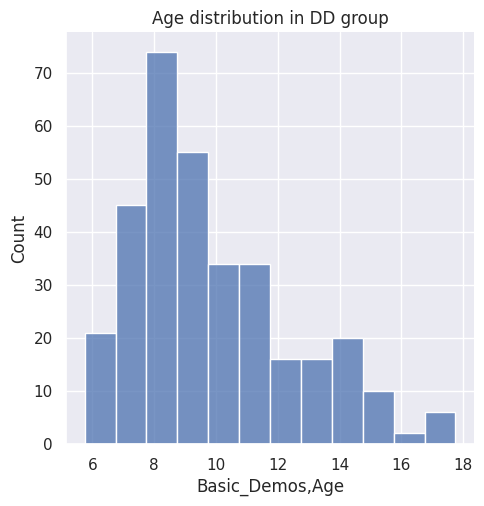

In [ ]:
sns.displot(data_filtered[data_filtered['DD'] == 1]['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in DD group');

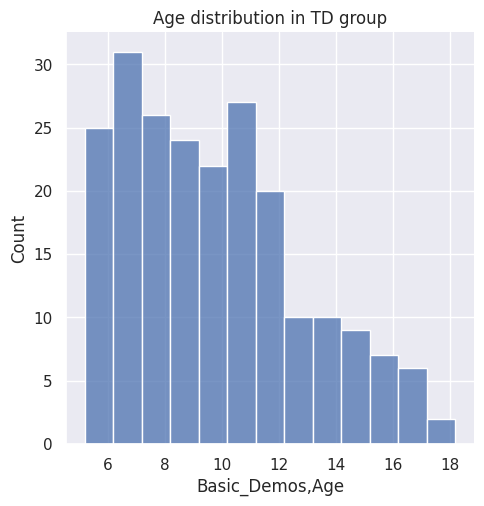

In [ ]:
sns.displot(data_filtered[data_filtered['Status'] == 'control']['Basic_Demos,Age'],
             binwidth = 1)
pl.title('Age distribution in TD group');

In [ ]:
print('5-6 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] > 5) & (data_filtered['Basic_Demos,Age'] < 6) & (data_filtered['Status'] != 'control')].shape[0])
print('6-7 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 6) & (data_filtered['Basic_Demos,Age'] < 7) & (data_filtered['Status'] != 'control')].shape[0])
print('7-8 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 7) & (data_filtered['Basic_Demos,Age'] < 8) & (data_filtered['Status'] != 'control')].shape[0])
print('8-9 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 8) & (data_filtered['Basic_Demos,Age'] < 9) & (data_filtered['Status'] != 'control')].shape[0])
print('9-10 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 9) & (data_filtered['Basic_Demos,Age'] < 10) & (data_filtered['Status'] != 'control')].shape[0])
print('10-11 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 10) & (data_filtered['Basic_Demos,Age'] < 11) & (data_filtered['Status'] != 'control')].shape[0])
print('11-12 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 11) & (data_filtered['Basic_Demos,Age'] < 12) & (data_filtered['Status'] != 'control')].shape[0])
print('from 12 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 12) & (data_filtered['Status'] != 'control')].shape[0])

5-6 years old
3
6-7 years old
34
7-8 years old
55
8-9 years old
62
9-10 years old
50
10-11 years old
35
11-12 years old
27
from 12 years old
67


In [ ]:
print('5-6 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] > 5) & (data_filtered['Basic_Demos,Age'] < 6) & (data_filtered['Status'] == 'control')].shape[0])
print('6-7 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 6) & (data_filtered['Basic_Demos,Age'] < 7) & (data_filtered['Status'] == 'control')].shape[0])
print('7-8 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 7) & (data_filtered['Basic_Demos,Age'] < 8) & (data_filtered['Status'] == 'control')].shape[0])
print('8-9 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 8) & (data_filtered['Basic_Demos,Age'] < 9) & (data_filtered['Status'] == 'control')].shape[0])
print('9-10 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 9) & (data_filtered['Basic_Demos,Age'] < 10) & (data_filtered['Status'] == 'control')].shape[0])
print('10-11 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 10) & (data_filtered['Basic_Demos,Age'] < 11) & (data_filtered['Status'] == 'control')].shape[0])
print('11-12 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 11) & (data_filtered['Basic_Demos,Age'] < 12) & (data_filtered['Status'] == 'control')].shape[0])
print('from 12 years old')
print(data_filtered[(data_filtered['Basic_Demos,Age'] >= 12) & (data_filtered['Status'] == 'control')].shape[0])

5-6 years old
22
6-7 years old
28
7-8 years old
31
8-9 years old
20
9-10 years old
22
10-11 years old
26
11-12 years old
21
from 12 years old
49


In [ ]:
diag = data_filtered.Diagnosis.values
adhd = []
for i in diag:
  if i == 0:
    adhd.append(0)
  elif 'ADHD' in i:
    if 'ADHD-Inattentive Type' in i:
      adhd.append('ADHD-Inattentive Type')
    elif 'ADHD-Combined Type' in i:
      adhd.append('ADHD-Combined Type')
    elif 'ADHD-Hyperactive/Impulsive Type' in i:
      adhd.append('ADHD-Hyperactive/Impulsive Type')
    elif 'Unspecified Attention-Deficit/Hyperactivity Disorder' in i:
      adhd.append('Unspecified ADHD')
    elif 'Other Specified Attention-Deficit/Hyperactivity Disorder' in i:
      adhd.append('Specified ADHD')
  else:
    adhd.append(0)

In [ ]:
data_filtered['ADHD'] = adhd

In [ ]:
data_filtered.ADHD.unique()

array(['ADHD-Inattentive Type', 0, 'ADHD-Combined Type',
       'ADHD-Hyperactive/Impulsive Type'], dtype=object)

In [ ]:
data_filtered[data_filtered['ADHD'] != 0].groupby(['ADHD'])[['Identifiers']].count()

,Identifiers
ADHD,
ADHD-Combined Type,78
ADHD-Hyperactive/Impulsive Type,7
ADHD-Inattentive Type,91
